##Getting Started With Matplotlib's OO Class Library
开始使用数学图形库的面向对象类库 (Translated from one [articl](https://github.com/ericliang/matplotlib/blob/master/trunk/scipy06/oo_resources/leftwich_tut.txt)_翻译自[原文](https://github.com/ericliang/matplotlib/blob/master/trunk/scipy06/oo_resources/leftwich_tut.txt))

###Introduction  
简介

For those people coming to Matplotlib without any prior experience of MatLab and who are familiar with the basic concepts of programming API's and classes, learning to use Matplotlib via the class library is an excellent choice. The library is well put together and works very intuitively once a few fundamentals are grasped.

对于那些人来到数学图形库而没有任何先前经验于 MatLab 和那些人熟悉于基本概念于编程应用公共接口及类的，学习使用数学图形库通过类库是一个极好的选择。此库被完善的组合在一起并且工作的非常直观一旦一些基础被抓住。

The advice from John Hunter, the original developer of the library is 'don't be afraid to open up matplotlib/pylab.py to see how the pylab interface forwards its calls to the OO layer.' That in combination with the user's guide, the examples/embedding demos, and the mailing lists, which are regularly read by many developers are an excellent way to learn the class library.

建议来自乔亨特，原始开发者于此库是“不要害怕打开数学图形库/pylab.py 去查看如何pylab接口面向他的呼叫到那面向对象层。“结合于用户导引，例子/内嵌测试，邮件列表，其被常规的阅读由许多开发者，是一个极好的方式去学习那个类库。

Following is a brief intoduction to using the class library, developed as I came to grips with how to produce my first graphs.

下面是一个简短的介绍到使用此类库，开发于当我攻克如何绘出我的第一个图形。

###Classes/Terms
类/目

**FigureCanvas** - is primarily a container class to hold the Figure instance, an approach which enforces a rigid segregation between the plot elements, and the drawing of those elements. It can be loosely thought of as 'the place where the ink gose'.

**图画布** - 是基本上一个容器类去承载那图画实例，一个途径其确保一个硬性分离之间于图形元素，和这些元素的绘制。他可以被简单的想成“墨水行走的地方”。

**Figure** - a container for one or more Axes. It is possible to create and manage an arbitrary number of figures using the Figure class. Note also that a figure can have its own line, text and patch elements, independent of any axes.

**图片** - 一个容器为了一个或者多个坐标系。他是可能取创造和管理一个任意数目的图片其使用图片类。也要注意一个图片可以拥有它自己的线，文本和补丁元素，独立于任何坐标系。

**Axes** -  the rectangular area which holds the basic element (Line2D, Rectangle, Text, etc) that are generated by the Axes plotting commands (e.g. the Axes plot, scatter, bar, hist methods). The Figure methods add_axes and add_subplot are used to create and add an Axes instance to the Figure. You should not instantiate an Axes instance yourself, but rather use one of these helper methods.

**坐标系** - 一个矩形区域其承载基本元素（二维线，矩形，文本，等等）其被生成由坐标系的绘图命令（如：坐标系的绘图，散点，柱形，直方方法）。图片的方法”添加坐标系“和”添加子绘图“被用来创建和添加一个坐标系实例到图片。你不应该实例化一个坐标系实例单独的，而是使用这些帮助方法之一。

**Line** - implemented in the Line2D class, can draw lines(!) with a variety of style (solid, dashed, dotted, etc), markers (location indicators on the line - point, circle, triangle, diamond, etc) and colours (k or #000000 -black, w or #FFFFFF - white, b or #000099 - blue, etc).

**线** - 被部署在二维线类，可以绘多重线带着丰富的样式（实线，虚线，点，等等），记号（位置标记在线上 - 点，圈，三角，钻石，等等）和颜色（k 或者 #000000 - 黑色， w 或者 #FFFFFF - 白色， b 或者 #000099 - 蓝色，等等）。

**Text** - a class that handles storing and drawing of text in window or data coordinates. The text can be coloured, rotated, aligned in various ways relative to the origin point, and have font properties(weight, style, etc) assigned to it.

**文本** - 一个类其把握保存和绘制文本在窗口或者数据相应。文本可以被着色，旋转，对齐在不同方式相对于原始点，且有字体属性（字重，样式，等等）被赋予给他。

**Patch** - a patch is a two dimensional shape with a separately sepcifiable face and edge colour. Specialised patch classes include circle, rectangle, regular polygon and more.

**补丁** - 一个补丁是一个二维形状带着一个分开指定的表面和边角颜色。特定的补丁类包括圆，矩形，规则多边形等等。

**Ticks** - the indicators of where on an axis a particular value lies. Separate classes exist for the x and y axis ticks, (XTick, YTick) and each are comprised of the primitive Line2D and Text instances that make up the tick.

**刻度线** - 位置标识于一个坐标轴之一个特定值所在。独立的类存在对应于x和y轴刻度线，（XTick, YTick）且每一个都构成由原始二维线和文本实例其组成彼刻度线。

**Artist** - Everything that draws into a canvas derives from Artist (Figure, Axes, Axis, Line2D, Rectangle, Text, and more). Some of these are primitives (Line2D, Rectangle, Text, Circle, etc) in that they do not contain any other Artists, some are simple composites, e.g. XTick which is mad up of a couple of Line2D and Text instances (upper and lower tick lines and labels), and some are complex, e.g. and Axes or a Figure, which contain both composite and primitive artists.

**艺术体** - 所有被画进画布的都衍生自艺术体（图片，坐标系，坐标轴，二维线，矩形，文本，等等）。其中有些是原始类（二维线，矩形，文本，圆形，等等）于其中他们不包含任何其他艺术体，一些是简单的组合体，例如X轴刻度线被构成由一对二维线和文本实例（上合下刻度线及标签），一些是复合体，如一个坐标系或者一个图片，其包含既有组合体也有原始艺术体。

###Techniques
技巧

###1. Setting up an agg backend canvas:
设定画布

In [59]:
%matplotlib inline
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)


# we tent to use OO, but it can still relies on pyplot to instantiate the figure. So more few to install.
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(8,8))

#设定默认编码适应中文
# import sys  
# reload(sys)  
# sys.setdefaultencoding('utf-8')    

###2. To set the size of the Figure, use the figsize keyword, which uses inches as the units:
设定图片尺寸，使用 figsize 关键字，其使用英寸作为单元。

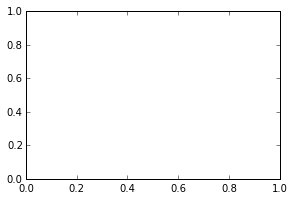

In [2]:
# this results in a 1000x300 pixel png - if output at 100 dpi, using
# canvas.print_figure(.., dpi=100)
fig = Figure(figsize=(10, 3))
ax1 = fig.add_subplot(121) # The 121 specifies 1 row, 2 column on subplot #1
canvas = FigureCanvas(fig)

fig

### 3. To add a single subplot
添加一个子绘图

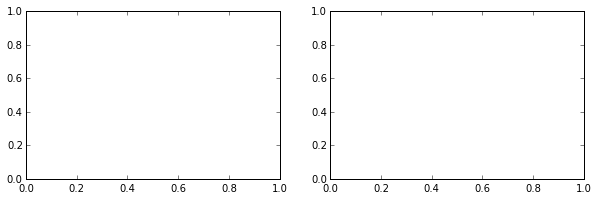

In [3]:
# The 111 specifies 1 row, 1 column on subplot #1
ax2 = fig.add_subplot(122)
fig

###4. To change the axes size and location on construction, e.g to fit the labels in on a small graph:
改变坐标系大小和位置在生成的时候，例如：设定标签到一个小号：

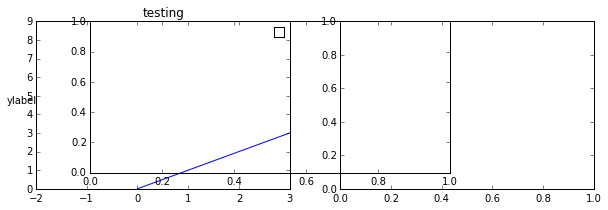

In [4]:
ax3 = fig.add_axes([0.2,0.2,0.5,0.7])

ax1.set_xlim(-2,3)
ax1.set_title('testing')
ax1.set_ylabel('ylabel',rotation=0)
ax1.legend(['legend','legned2'])
ax1.plot(range(0,10),range(0,10))

fig

An exiting Axes position/location can be changed by calling the set_position() method.

一个存在的坐标系位置/定位可以被改变由呼叫 set_position() 方法。

###5. Adding a graph of some sort is as simple as calling the requied functin on the axes instance:
添加一个视图于一些排列只是呼叫需要的函数在那坐标系实例：

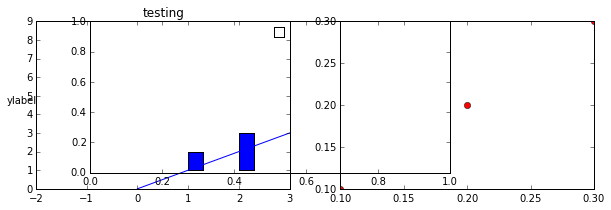

In [5]:
p = ax1.bar([1,2,3],[1,2,3],0.3,bottom=1)# left, height, width, bottom
p1 = ax2.plot([0.1,0.2,0.3],[0.1,0.2,0.3],'ro')
fig

###6. Setting a label with extra small text:
设定标签以特小文本。

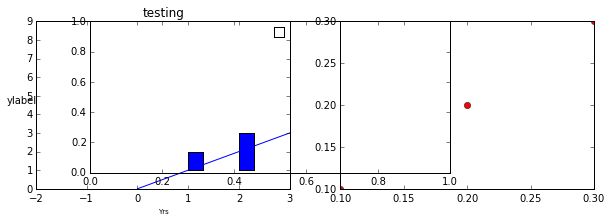

In [6]:
ax1.set_xlabel('Yrs', size='x-small')
fig

###7. Setting the graph title:
设定视图标题。

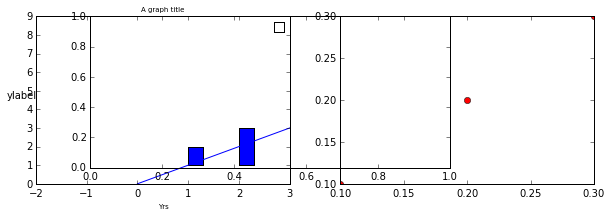

In [7]:
ax1.set_title('A graph title', size='x-small')
fig

###8. To enable only the horizontal grid on the major ticks:
只启用水平栅格在主刻度线。

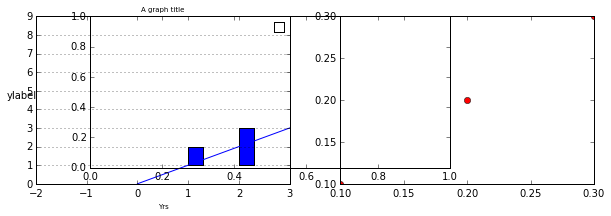

In [8]:
ax1.grid(False)
ax1.yaxis.grid(True, which='major')
fig

###9. To only have a left y-axis and a bottom x-axis:
只要左y坐标轴和一个底部x坐标轴。

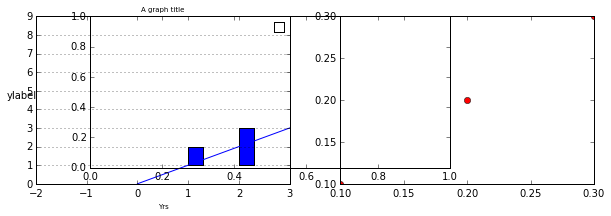

In [9]:
from matplotlib.lines import Line2D

# set the edgecolor and facecolor of the axes rectangle to be the same 
frame = ax1.axesPatch
frame.set_edgecolor(frame.get_facecolor())
# Specify a line in axes coords to represent the left and bottom axes.
bottom = Line2D([0,1],[0,0], transform=ax1.transAxes)
left   = Line2D([0,0],[0,1], transform=ax1.transAxes)
ax1.add_line(bottom)
ax1.add_line(left)
fig

###10. To change the size of the tick labels:
改变刻度线标签大小。

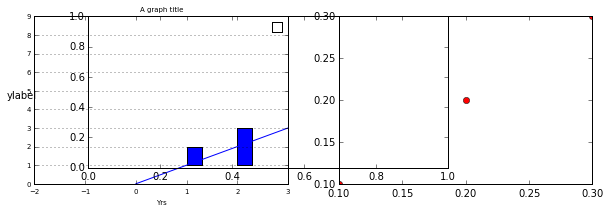

In [10]:
labels = ax1.get_xticklabels() + ax1.get_yticklabels()
for label in labels:
    label.set_size('x-small')
fig

###11. Removing the black ractangle around an individual bar graph rectangle (by changing it to the bar colour):
移除黑色边矩形包围在一个独立柱形矩形（通过改变他到柱形的颜色）。

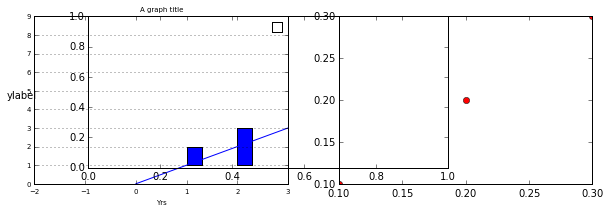

In [11]:
c = '#7FBFFF'
p1 = ax1.bar(4, 2,color=c)
for r in p1:
    r.set_edgecolor(c)
fig

###Putting it together
聚合

Following is a simple example of how to use the class library.
This is example/agg_oo.py in the matplotlib src distribution, also found (like all examples) at http://matplotlib.sf.net/examples

'''  
A pure OO (look Ma, no pylab!) example using the agg backend

'''

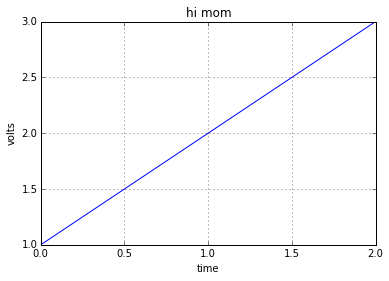

In [12]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot([1,2,3])
ax.set_title('hi mom')
ax.grid(True)
ax.set_xlabel('time')
ax.set_ylabel('volts')
#canvas.print_figure('test')
fig

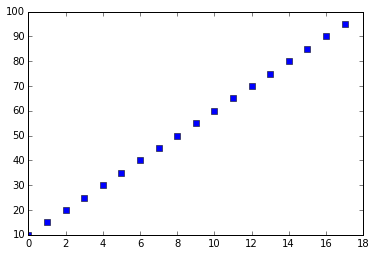

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#最简单的数学绘图
plt.plot(range(10,100,5),'bs')# b代表blue,s代表squre。还有rgk,-^_o可用。

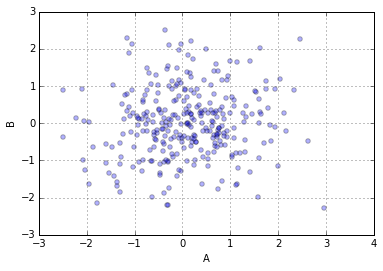

In [14]:
import numpy as np
import pandas as pd

# 一下三行代码测试生成随机散列图，来检查数据的重复状况，颜色越浓说明数据重复越高。
dates = pd.date_range('20150101', periods= 300)#生成随机Series
df1 = pd.DataFrame(np.random.randn(300,4), index=dates, columns=list('ABCD'))#生成随机DataFrame
df1.plot(kind='scatter',x='A', y='B', alpha=0.3)#生成散列图，查看数据重复状况，alpha设定透明度。

In [15]:
#面向对象的视图化思维
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
# fig    = Figure()
# canvas = FigureCanvas(fig)
# ax     = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# line,  = ax.plot([0,1], [0,1])
# ax.set_title("a straight line (OO)")
# ax.set_xlabel("x value")
# ax.set_ylabel("y value")
# #canvas.print_figure('/Users/chengang/Desktop/demo.pdf')

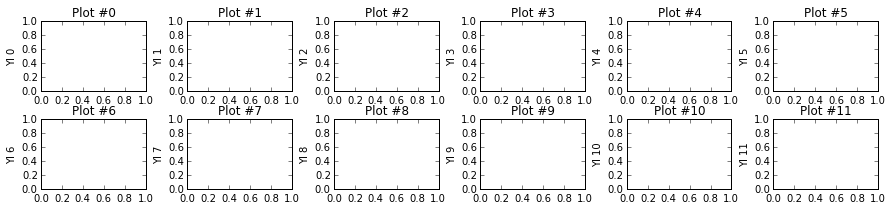

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 3),dpi=100)
ax = range(12)
for i in range(12):
    ax[i] = fig.add_subplot(2,6,i+1)
    ax[i].set_title('Plot #%i' % i)
    ax[i].set_ylabel('Yl %i' % i)
    #ax[i].set_legend(['x']) #'AxesSubplot' object has no attribute 'set_legend'
fig.subplots_adjust(wspace=0.4,hspace=0.4) # adjust space
fig.savefig('f.pdf') # fig.savefig('f.png', dpi=200)

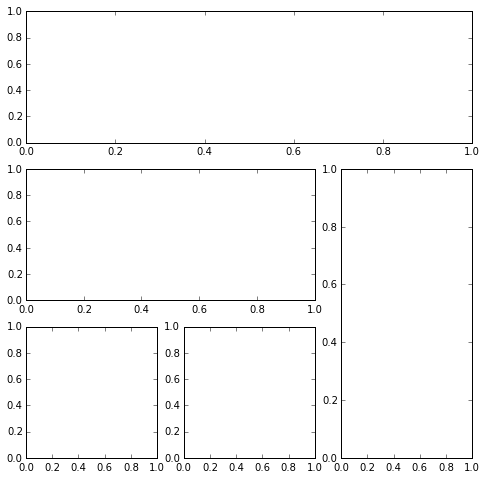

In [17]:
fig = plt.figure(figsize=(8,8))#  we tent to use OO, but it still relies on pyplot to instantiate the figure.
gs = plt.GridSpec(3,3)
axa = fig.add_subplot(gs[0,:])
axb = fig.add_subplot(gs[1,:2])
axc = fig.add_subplot(gs[1:,2])
axd = fig.add_subplot(gs[2,0])
axe = fig.add_subplot(gs[2,1])

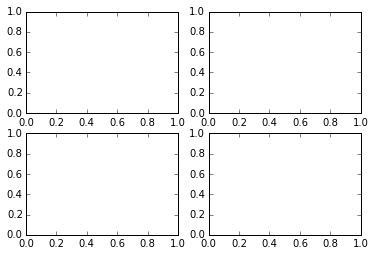

In [18]:
figs,ax = plt.subplots(2,2)

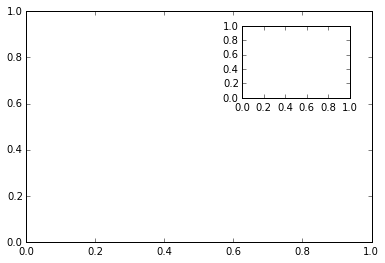

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

figi = plt.figure()
maax = figi.add_axes([0.1,0.1,0.8,0.8])
inax = figi.add_axes([0.6,0.6,0.25,0.25])

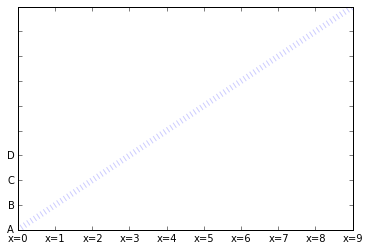

In [20]:
figg = plt.figure()
axx = figg.add_subplot(111)
axx.plot(range(0,10), alpha=0.2,linewidth=6,linestyle=':')
axx.xaxis.set_major_formatter(plt.FormatStrFormatter('x=%i'))
axx.yaxis.set_major_formatter(plt.FixedFormatter(['A','B','C','D']))

/Users/chengang/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


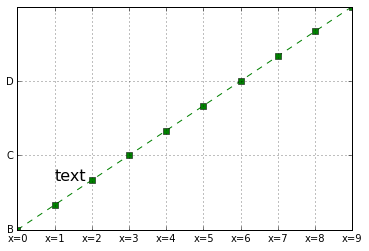

In [21]:
figg = plt.figure()
axx = figg.add_subplot(111)
axx.plot(range(0,10),'g--',marker='s')
axx.xaxis.set_major_formatter(plt.FormatStrFormatter('x=%i'))
axx.yaxis.set_major_formatter(plt.FixedFormatter(['A','B','C','D']))
axx.yaxis.set_major_locator(plt.MultipleLocator(3))
axx.legend(loc='upper right')
axx.axis('tight')
#axx.set_xticks([1,2,3])
#axx.set_xticklabels([2.2,2,2])
axx.grid(True)
axx.text(1,2,'text',fontsize=16)




In [22]:
plt.rcParams.keys()[:5]# check params

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec']

In [23]:
plt.rcParams['lines.linewidth']#check params value

1.0

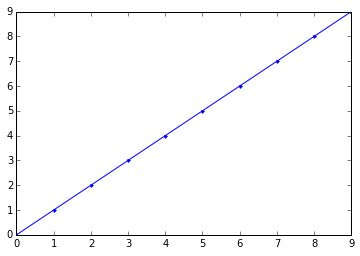

In [24]:
plt.rc('lines',linewidth=1.0)# rc(elememt_name, attr=val)
plt.plot(range(0,10),'b.-')

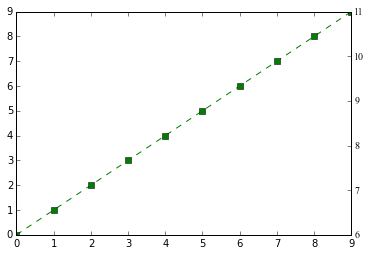

In [25]:
figg = plt.figure()
axx = figg.add_subplot(111)
axx.plot(range(0,10),'g--',marker='s')
axx2 = axx.twinx() # creat a new axes(axx2) shares the x-axis with axx.
axx2.set_yticklabels(range(6,12)) # setting axx2.y tick labels
for tick in axx2.yaxis.get_ticklabels():
    tick.set_fontname('Times New Roman')


In [26]:
import matplotlib
matplotlib.matplotlib_fname()

u'/Users/chengang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'

/Users/chengang/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


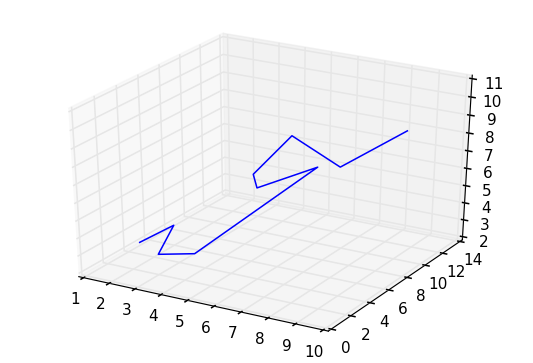

In [27]:
#%matplotlib inline

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['savefig.dpi']=110



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = [1,2,3,4,5,6,7,8,9,10],[5,6,2,3,13,4,1,2,4,8],[2,3,3,3,5,7,9,11,9,10]
ax.plot_wireframe(X, Y, Z)


fig.show()

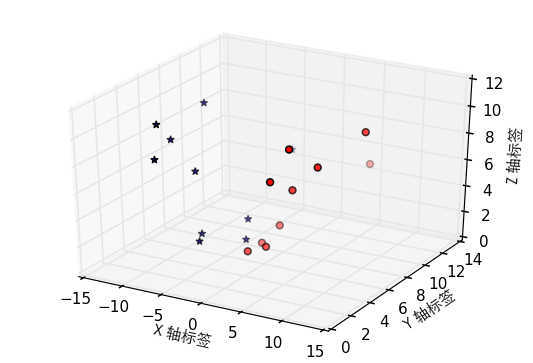

In [31]:
# coding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf-8')#设定默认编码适应中文


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = [1,2,3,4,5,6,7,8,9,10],[5,6,2,3,13,4,1,2,4,8],[2,3,3,3,5,7,9,11,9,10]
ax.scatter(X,Y,Z,marker='o',c='r')

Xs, Ys, Zs = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10],[5,6,2,3,13,4,1,2,4,8],[2,3,3,3,5,7,9,11,9,10]
ax.scatter(Xs,Ys,Zs,marker='*',c='b')

ax.set_xlabel(u'X 轴标签',fontproperties='STHeiti',rotation=-10)
ax.set_ylabel(u'Y 轴标签',fontproperties='STHeiti',rotation=40)
ax.set_zlabel(u'Z 轴标签',fontproperties='STHeiti',rotation=90)
fig.show()

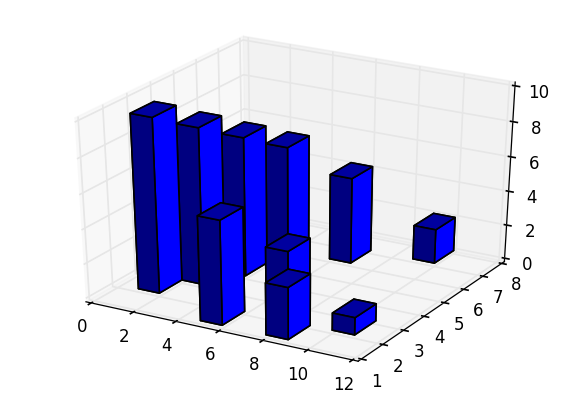

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

matplotlib.rcParams['savefig.dpi']=120

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [1,2,3,4,5,6,7,8,9,10]
ypos = [2,3,4,5,1,6,2,1,7,2]
zpos = [0,0,0,0,0,0,0,0,0,0]

dx   = [1,1,1,1,1,1,1,1,1,1]
dy   = [1,1,1,1,1,1,1,1,1,1]
dz   = list(reversed([1,2,3,4,5,6,7,8,9,10]))

ax.bar3d(xpos,ypos,zpos,dx,dy,dz)
plt.show()

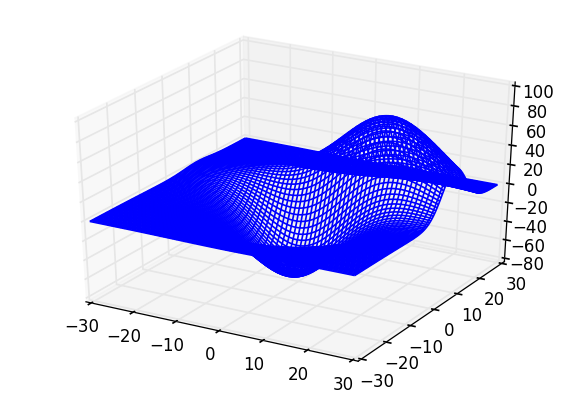

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

matplotlib.rcParams['savefig.dpi']=120

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def get_test_data(delta=0.05):

    from matplotlib.mlab import  bivariate_normal
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    Z = Z2 - Z1

    X = X * 10
    Y = Y * 10
    Z = Z * 500
    return X, Y, Z

x,y,z = axes3d.get_test_data(0.05)
ax.plot_wireframe(x,y,z,rstride=1,cstride=2)

plt.show()


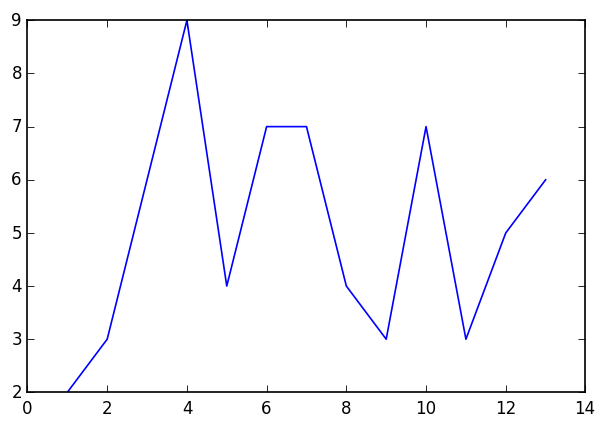

In [34]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# change the txt file and auto change the figure.
def animate(i):
    pullData = open("/Users/chengang/Desktop/sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

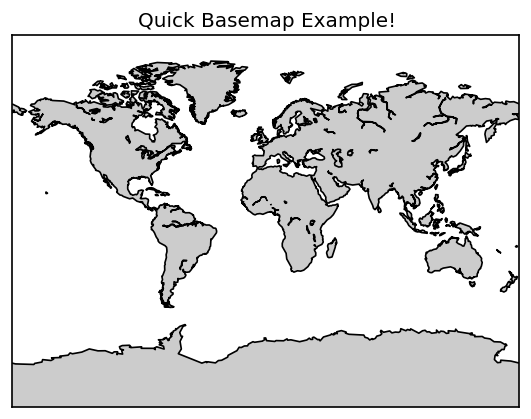

In [35]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
plt.title("Quick Basemap Example!")
plt.show()


Stock to plot: AAPL


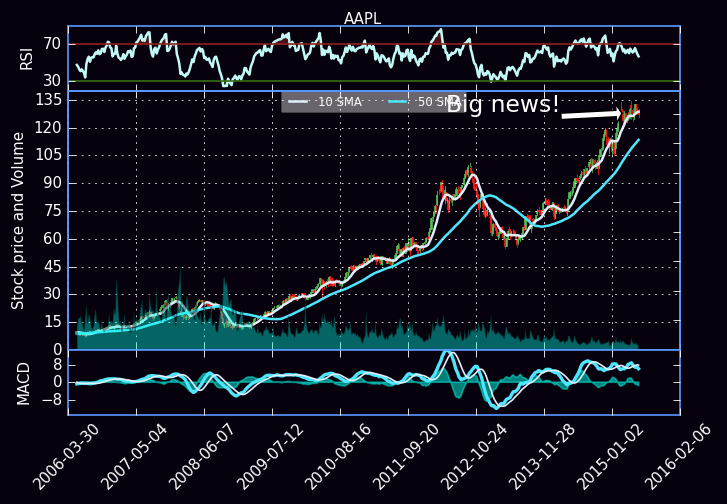

Stock to plot: q
Stock to plot: exit


KeyboardInterrupt: 

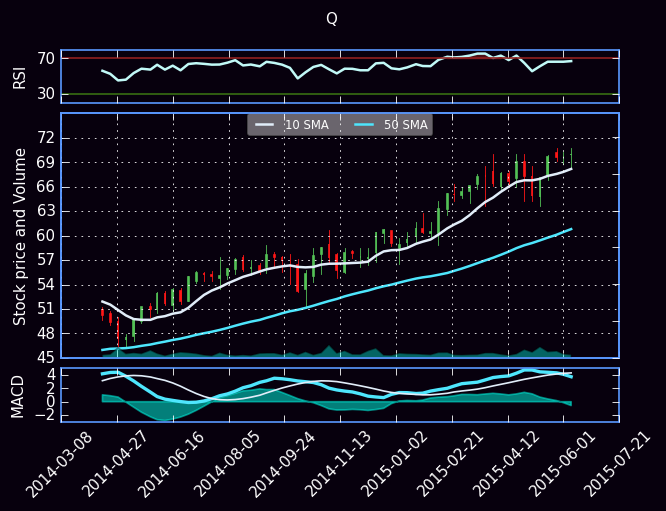

In [37]:
%matplotlib inline

import urllib2
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib.finance import candlestick
import matplotlib
import pylab
matplotlib.rcParams.update({'font.size': 9})
matplotlib.rcParams['savefig.dpi']=120



eachStock = 'EBAY','TSLA','AAPL'

def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

def movingaverage(values,window):
    weigths = np.repeat(1.0, window)/window
    smas = np.convolve(values, weigths, 'valid')
    return smas # as a numpy array

########EMA CALC ADDED############
def ExpMovingAverage(values, window):
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a


def computeMACD(x, slow=26, fast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = ExpMovingAverage(x, slow)
    emafast = ExpMovingAverage(x, fast)
    return emaslow, emafast, emafast - emaslow

###############################
def graphData(stock,MA1,MA2):
    #######################################
    #######################################
    '''
        Use this to dynamically pull a stock:
    '''
    try:
        print 'Currently Pulling',stock
        print str(datetime.datetime.fromtimestamp(int(time.time())).strftime('%Y-%m-%d %H:%M:%S'))
        #Keep in mind this is close high low open, lol. 
        urlToVisit = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
        stockFile =[]
        try:
            sourceCode = urllib2.urlopen(urlToVisit).read()
            splitSource = sourceCode.split('\n')
            for eachLine in splitSource:
                splitLine = eachLine.split(',')
                if len(splitLine)==6:
                    if 'values' not in eachLine:
                        stockFile.append(eachLine)
        except Exception, e:
            print str(e), 'failed to organize pulled data.'
    except Exception,e:
        print str(e), 'failed to pull pricing data'
    #######################################
    #######################################
    try:   
        date, closep, highp, lowp, openp, volume = np.loadtxt(stockFile,delimiter=',', unpack=True,
                                                              converters={ 0: mdates.strpdate2num('%Y%m%d')})
        x = 0
        y = len(date)
        newAr = []
        while x < y:
            appendLine = date[x],openp[x],closep[x],highp[x],lowp[x],volume[x]
            newAr.append(appendLine)
            x+=1
            
        Av1 = movingaverage(closep, MA1)
        Av2 = movingaverage(closep, MA2)

        SP = len(date[MA2-1:])
            
        fig = plt.figure(facecolor='#07000d')

        ax1 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4, axisbg='#07000d')
        candlestick(ax1, newAr[-SP:], width=.6, colorup='#53c156', colordown='#ff1717')

        Label1 = str(MA1)+' SMA'
        Label2 = str(MA2)+' SMA'

        ax1.plot(date[-SP:],Av1[-SP:],'#e1edf9',label=Label1, linewidth=1.5)
        ax1.plot(date[-SP:],Av2[-SP:],'#4ee6fd',label=Label2, linewidth=1.5)
        
        ax1.grid(True, color='w')
        ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax1.yaxis.label.set_color("w")
        ax1.spines['bottom'].set_color("#5998ff")
        ax1.spines['top'].set_color("#5998ff")
        ax1.spines['left'].set_color("#5998ff")
        ax1.spines['right'].set_color("#5998ff")
        ax1.tick_params(axis='y', colors='w')
        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
        ax1.tick_params(axis='x', colors='w')
        plt.ylabel('Stock price and Volume')

        maLeg = plt.legend(loc=9, ncol=2, prop={'size':7},
                   fancybox=True, borderaxespad=0.)
        maLeg.get_frame().set_alpha(0.4)
        textEd = pylab.gca().get_legend().get_texts()
        pylab.setp(textEd[0:5], color = 'w')

        volumeMin = 0
        
        ax0 = plt.subplot2grid((6,4), (0,0), sharex=ax1, rowspan=1, colspan=4, axisbg='#07000d')
        rsi = rsiFunc(closep)
        rsiCol = '#c1f9f7'
        posCol = '#386d13'
        negCol = '#8f2020'
        
        ax0.plot(date[-SP:], rsi[-SP:], rsiCol, linewidth=1.5)
        ax0.axhline(70, color=negCol)
        ax0.axhline(30, color=posCol)
        ax0.fill_between(date[-SP:], rsi[-SP:], 70, where=(rsi[-SP:]>=70), facecolor=negCol, edgecolor=negCol, alpha=0.5)
        ax0.fill_between(date[-SP:], rsi[-SP:], 30, where=(rsi[-SP:]<=30), facecolor=posCol, edgecolor=posCol, alpha=0.5)
        ax0.set_yticks([30,70])
        ax0.yaxis.label.set_color("w")
        ax0.spines['bottom'].set_color("#5998ff")
        ax0.spines['top'].set_color("#5998ff")
        ax0.spines['left'].set_color("#5998ff")
        ax0.spines['right'].set_color("#5998ff")
        ax0.tick_params(axis='y', colors='w')
        ax0.tick_params(axis='x', colors='w')
        plt.ylabel('RSI')

        ax1v = ax1.twinx()
        ax1v.fill_between(date[-SP:],volumeMin, volume[-SP:], facecolor='#00ffe8', alpha=.4)
        ax1v.axes.yaxis.set_ticklabels([])
        ax1v.grid(False)
        ###Edit this to 3, so it's a bit larger
        ax1v.set_ylim(0, 3*volume.max())
        ax1v.spines['bottom'].set_color("#5998ff")
        ax1v.spines['top'].set_color("#5998ff")
        ax1v.spines['left'].set_color("#5998ff")
        ax1v.spines['right'].set_color("#5998ff")
        ax1v.tick_params(axis='x', colors='w')
        ax1v.tick_params(axis='y', colors='w')
        ax2 = plt.subplot2grid((6,4), (5,0), sharex=ax1, rowspan=1, colspan=4, axisbg='#07000d')
        fillcolor = '#00ffe8'
        nslow = 26
        nfast = 12
        nema = 9
        emaslow, emafast, macd = computeMACD(closep)
        ema9 = ExpMovingAverage(macd, nema)
        ax2.plot(date[-SP:], macd[-SP:], color='#4ee6fd', lw=2)
        ax2.plot(date[-SP:], ema9[-SP:], color='#e1edf9', lw=1)
        ax2.fill_between(date[-SP:], macd[-SP:]-ema9[-SP:], 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)

        plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(prune='upper'))
        ax2.spines['bottom'].set_color("#5998ff")
        ax2.spines['top'].set_color("#5998ff")
        ax2.spines['left'].set_color("#5998ff")
        ax2.spines['right'].set_color("#5998ff")
        ax2.tick_params(axis='x', colors='w')
        ax2.tick_params(axis='y', colors='w')
        plt.ylabel('MACD', color='w')
        ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='upper'))
        for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

        plt.suptitle(stock.upper(),color='w')

        plt.setp(ax0.get_xticklabels(), visible=False)
        ### add this ####
        plt.setp(ax1.get_xticklabels(), visible=False)
        
        ax1.annotate('Big news!',(date[510],Av1[510]),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='white', shrink=0.05),
            fontsize=14, color = 'w',
            horizontalalignment='right', verticalalignment='bottom')

        plt.subplots_adjust(left=.09, bottom=.14, right=.94, top=.95, wspace=.20, hspace=0)
        plt.show()
        fig.savefig('example.png',facecolor=fig.get_facecolor())
           
    except Exception,e:
        print 'main loop',str(e)

while True:
    stock = raw_input('Stock to plot: ')
    graphData(stock,10,50)

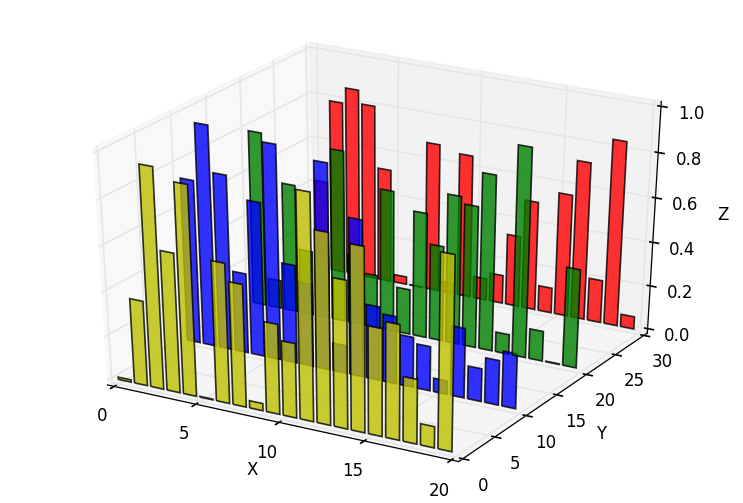

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['savefig.dpi']=120

fig = plt.figure()
ax = Axes3D(fig)
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
     xs = np.arange(20)
     ys = np.random.rand(20)
     ax.bar(xs, ys, zs=z, zdir='y', color=c, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show() 

 ###Install Basemap: 
1. inastall mac-app of Anaconda
2. conda install basemap
3. check AIP: http://matplotlib.org/basemap/api/basemap_api.html#module-mpl_toolkits.basemap

###The relevant Basemap methods are:

drawcoastlines(): draw coastlines.

fillcontinents(): color the interior of continents (by filling the coastline polygons). Unfortunately, the fillcontinents method doesn’t always do the right thing. Matplotlib always tries to fill the inside of a polygon. Under certain situations, what is the inside of a coastline polygon can be ambiguous, and the outside may be filled instead of the inside. In these situations, the recommended workaround is to use the drawlsmask() method to overlay an image with different colors specified for land and water regions (see below).

drawcountries(): draw country boundaries.

drawstates(): draw state boundaries in North America.

drawrivers(): draw rivers.


Instead of drawing coastlines and political boundaries, an image can be used as a map background. Basemap provides several options for this:

drawlsmask(): draw a high-resolution land-sea mask as an image, with land and ocean colors specified. The land-sea mask is derived from the GSHHS coastline data, and there are several coastline options and pixel sizes to choose from.

bluemarble(): draw a NASA Blue Marble image as a map background.

shadedrelief(): draw a shaded relief image as a map background.

etopo(): draw an etopo relief image as map background.

warpimage(): use an abitrary image as a map background. The image must be global, covering the world in lat/lon coordinates from the international dateline eastward and the South Pole northward.

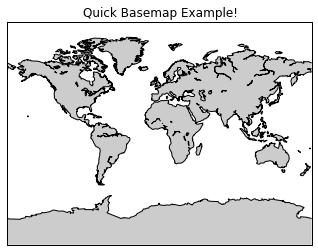

In [39]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
plt.title("Quick Basemap Example!")
plt.show()

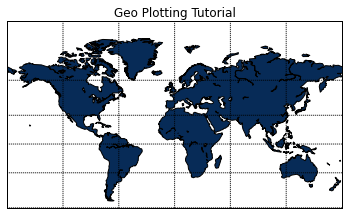

In [40]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines
# you can also have 'l' for low, then 'h' for high. Unless coastlines are
# really important to you, or lakes, you should just use c for crude.
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#072B57',lake_color='#FFFFFF')
# draw parallels and meridians.

m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))

m.drawmapboundary(fill_color='#FFFFFF')
plt.title("Geo Plotting Tutorial")
plt.show()

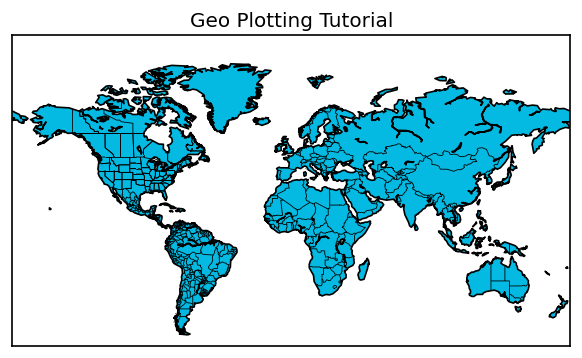

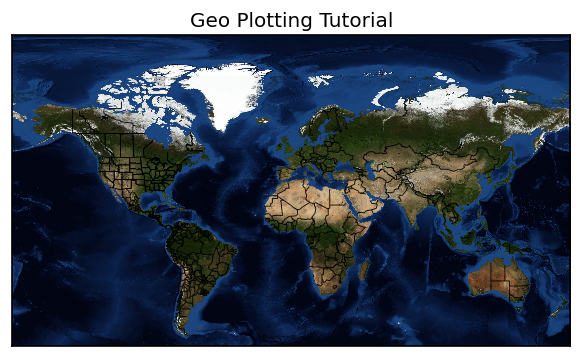

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
%matplotlib inline
matplotlib.rcParams['savefig.dpi']=120


def basicMap():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')

    m.drawcoastlines()

    m.drawcountries()
    m.drawstates()


    m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')

    m.drawmapboundary(fill_color='#FFFFFF')
    plt.title("Geo Plotting Tutorial")
    plt.show()

basicMap()

def coolerProjections():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')

    m.drawcountries()
    m.drawstates()


    m.bluemarble()

    plt.title("Geo Plotting Tutorial")
    plt.show()


# are you getting an error like:
# ImportError: The _imaging C module is not installed
# This meanss you have PIL, but you have the wrong bit version.
# If it says you don't have PIL at all, then you better go grab it
# but this should have come with your matplotlib installation.

coolerProjections()

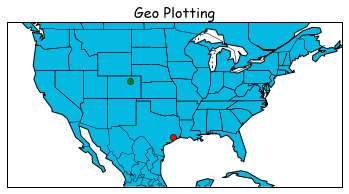

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def mapTut():

    m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                llcrnrlon=-130,urcrnrlon=-60,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
    m.drawmapboundary(fill_color='#FFFFFF')


    # Houston, Texas

    lat,lon = 29.7630556,-95.3630556
    x,y = m(lon,lat)
    m.plot(x,y, 'ro')
    

    lon, lat = -104.237, 40.125 # Location of Boulder

    xpt,ypt = m(lon,lat)
    m.plot(xpt,ypt, 'go')


    
    plt.title("Geo Plotting")
    plt.show()


mapTut()

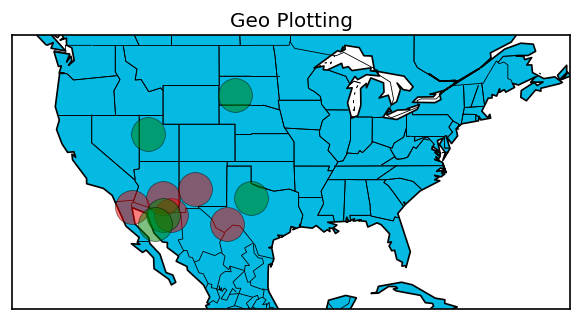

In [43]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = 30,31,34,33,32
lon = -103,-110,-107,-111,-115


lat2 = 40,33,44,31,30
lon2 = -113,-100,-102,-111,-112

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)

x,y = m(lon2,lat2)
m.plot(x,y,'go',markersize=20,alpha=.5)

plt.title('Geo Plotting')
plt.show()

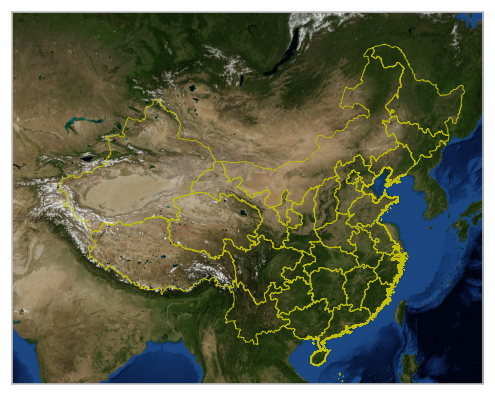

In [97]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['savefig.dpi']=120
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95)


#Download shapefile from http://gadm.org/
m.readshapefile('/Users/chengang/Downloads/CHN_adm/CHN_adm1','beijing',color='y')
m.bluemarble()
plt.show()


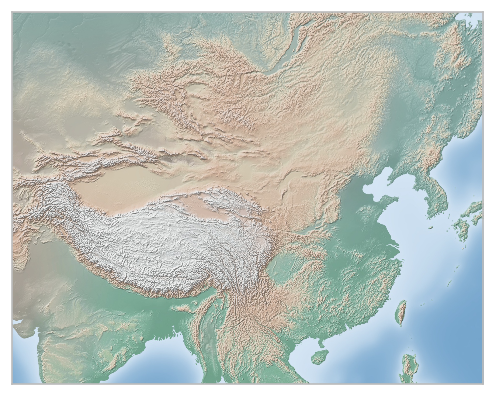

In [99]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95)

m.shadedrelief()
plt.show()


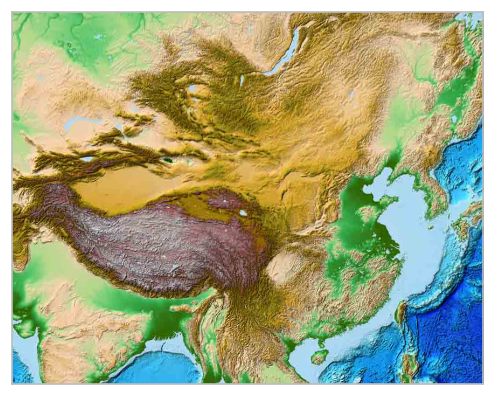

In [68]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95)
m.etopo()
plt.show()


###USA
lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.
###China
llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95



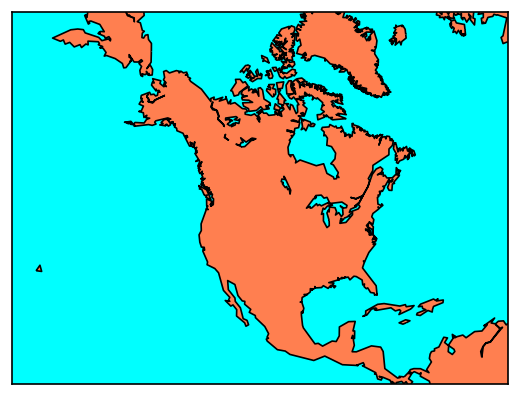

In [47]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()


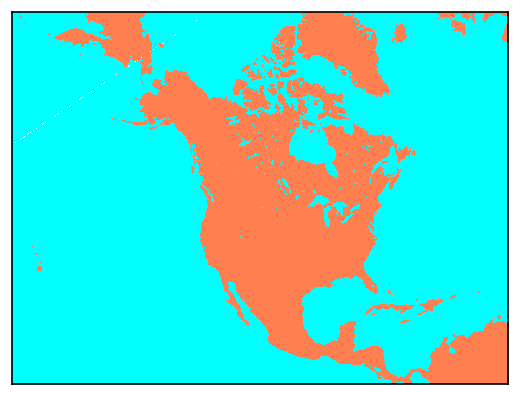

In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a land-sea mask for a map background.
# lakes=True means plot inland lakes with ocean color.
m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)

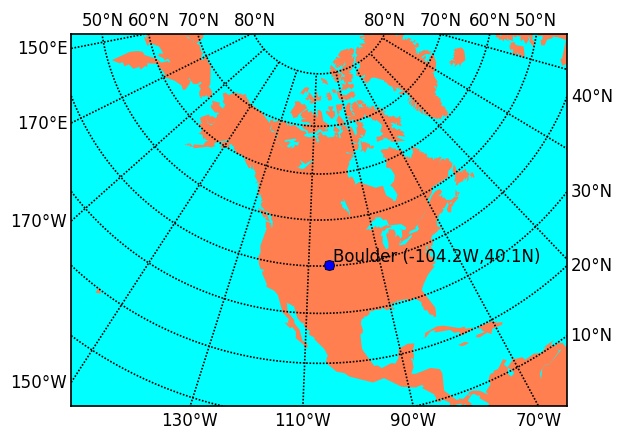

In [49]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# plot blue dot on Boulder, colorado and label it as such.
lon, lat = -104.237, 40.125 # Location of Boulder
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')  # plot a blue dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()

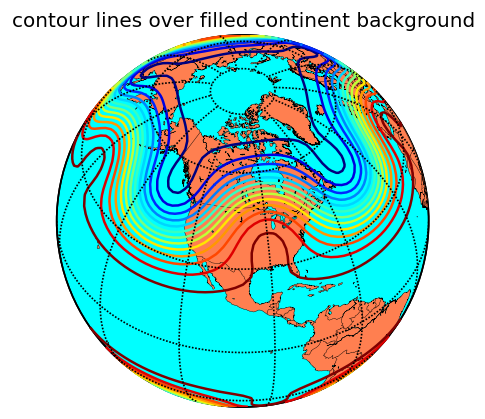

In [50]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

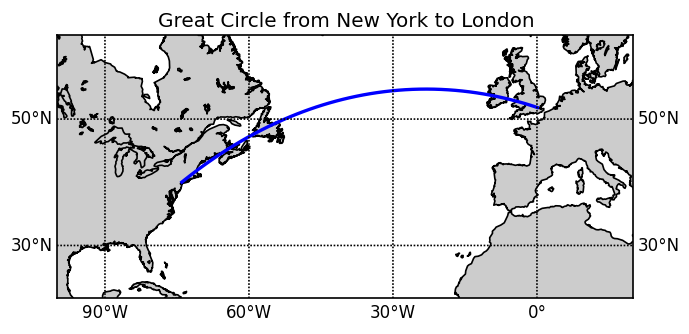

In [51]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
ax.set_title('Great Circle from New York to London')
plt.show()

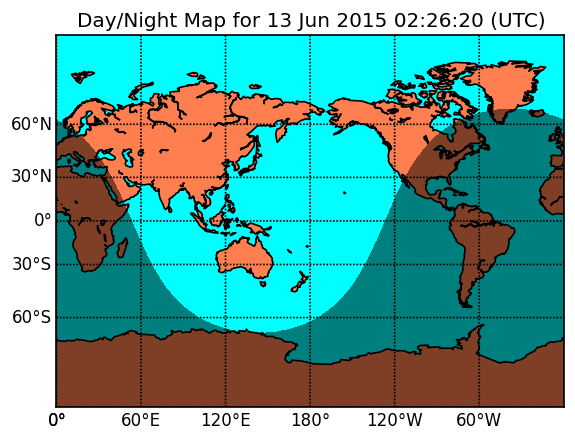

In [52]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

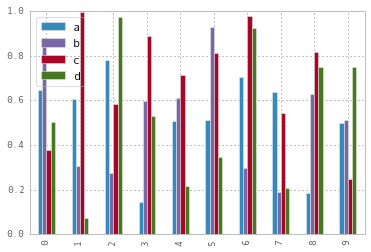

In [57]:
%matplotlib inline

import matplotlib
import pandas as pd

import numpy as np

#pd.options.display.mpl_style = 'default'  

df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot(kind='bar');
 

import sys  
reload(sys)  
sys.setdefaultencoding('utf-8')#设定默认编码适应中文    


from matplotlib import style #使用ggplot样式     
matplotlib.style.use('ggplot')  

pd.options.display.mpl_style = 'default'#使用美化样式

###pandas.DataFrame.plot
DataFrame.plot(     

                data,   
                x =None,     
                y =None,   
                kind ='line',   
                ax =None,   
                subplots =False,   
                sharex =None,   
                sharey =False,   
                layout =None,   
                figsize =None,   
                use_index =True,   
                title =None,   
                grid =None,   
                legend =True,   
                style =None,   
                logx =False,   
                logy =False,   
                loglog =False,   
                xticks =None,   
                yticks =None,   
                xlim =None,   
                ylim =None,   
                rot =None,   
                fontsize =None,   
                colormap =None,   
                table =False,   
                yerr =None,   
                xerr =None,   
                secondary_y =False,   
                sort_columns =False,   
                **kwds
                
                )  
 

Make plots of DataFrame using matplotlib / pylab.

Parameters:	
data : DataFrame   
x : label or position, default None    
y : label or position, default None   
Allows plotting of one column versus another  

kind : str  
‘line’ : line plot (default)  
‘bar’ : vertical bar plot  
‘barh’ : horizontal bar plot  
‘hist’ : histogram  
‘box’ : boxplot  
‘kde’ : Kernel Density Estimation plot  
‘density’ : same as ‘kde’  
‘area’ : area plot  
‘pie’ : pie plot  
‘scatter’ : scatter plot  
‘hexbin’ : hexbin plot  

ax : matplotlib axes object, default None  
subplots : boolean, default False  
Make separate subplots for each column  
sharex : boolean, default True if ax is None else False  
In case subplots=True, share x axis and set some x axis labels to invisible; defaults to True if ax is None otherwise False if an ax is passed in; Be aware, that passing in both an ax and sharex=True will alter all x axis labels for all axis in a figure!   
sharey : boolean, default False  
In case subplots=True, share y axis and set some y axis labels to invisible  
layout : tuple (optional)  
(rows, columns) for the layout of subplots  
figsize : a tuple (width, height) in inches  
use_index : boolean, default True  
Use index as ticks for x axis  
title : string  
Title to use for the plot  
grid : boolean, default None (matlab style default)  
Axis grid lines  
legend : False/True/’reverse’  
Place legend on axis subplots  
style : list or dict  
matplotlib line style per column  
logx : boolean, default False  
Use log scaling on x axis  
logy : boolean, default False  
Use log scaling on y axis  
loglog : boolean, default False  
Use log scaling on both x and y axes  
xticks : sequence  
Values to use for the xticks  
yticks : sequence  
Values to use for the yticks  
xlim : 2-tuple/list  
ylim : 2-tuple/list  
rot : int, default None  
Rotation for ticks (xticks for vertical, yticks for horizontal plots)  
fontsize : int, default None  
Font size for xticks and yticks  
colormap : str or matplotlib colormap object, default None  
Colormap to select colors from. If string, load colormap with that name from matplotlib.  
colorbar : boolean, optional  
If True, plot colorbar (only relevant for ‘scatter’ and ‘hexbin’ plots)  
position : float  
Specify relative alignments for bar plot layout. From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)  
layout : tuple (optional)  
(rows, columns) for the layout of the plot  
table : boolean, Series or DataFrame, default False  
If True, draw a table using the data in the DataFrame and the data will be transposed to meet matplotlib’s default layout. If a Series or DataFrame is passed, use passed data to draw a table.  
yerr : DataFrame, Series, array-like, dict and str
See Plotting with Error Bars for detail.  
xerr : same types as yerr.  
stacked : boolean, default False in line and
bar plots, and True in area plot. If True, create stacked plot.  
sort_columns : boolean, default False
Sort column names to determine plot ordering  
secondary_y : boolean or sequence, default False  
Whether to plot on the secondary y-axis If a list/tuple, which columns to plot on secondary y-axis
mark_right : boolean, default True  
When using a secondary_y axis, automatically mark the column labels with “(right)” in the legend
kwds : keywords
Options to pass to matplotlib plotting method  
Returns:	
axes : matplotlib.AxesSubplot or np.array of them  

class mpl_toolkits.basemap.Basemap(

                llcrnrlon=None, 
                llcrnrlat=None, 
                urcrnrlon=None, 
                urcrnrlat=None, 
                llcrnrx=None, 
                llcrnry=None, 
                urcrnrx=None, 
                urcrnry=None, 
                width=None, 
                height=None, 
                projection='cyl', 
                resolution='c', 
                area_thresh=None, 
                rsphere=6370997.0, 
                ellps=None, 
                lat_ts=None, 
                lat_1=None, 
                lat_2=None, 
                lat_0=None, 
                lon_0=None, 
                lon_1=None, 
                lon_2=None, 
                o_lon_p=None, 
                o_lat_p=None, 
                k_0=None, 
                no_rot=False, 
                suppress_ticks=True, 
                satellite_height=35786000, 
                boundinglat=None, 
                fix_aspect=True, 
                anchor='C', 
                celestial=False, 
                round=False, 
                epsg=None, 
                ax=None
                
                )

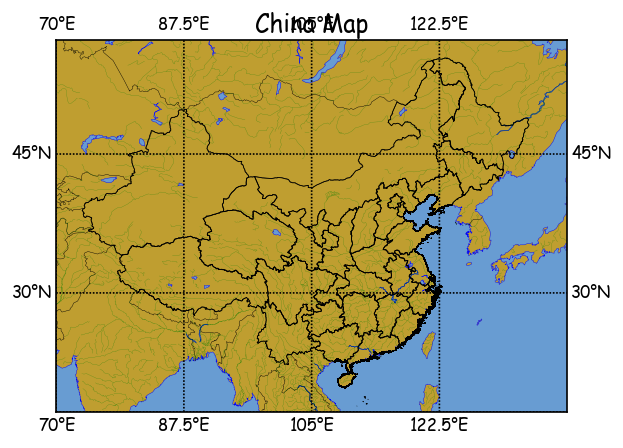

In [103]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

map = Basemap(projection='merc',llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95,resolution='l')
map.drawcoastlines(linewidth=0.25,color='b')
map.drawcountries(linewidth=0.25,color='k')
map.drawstates(linewidth=0.2,color='r')
map.drawrivers(linewidth=0.1,color='g')
map.drawmapboundary(fill_color='#689CD2')
map.drawmeridians(np.arange(70,140,17.5),labels=np.arange(70,140,17.5))
map.drawparallels(np.arange(15,55,15),labels=np.arange(15,55,15))
map.fillcontinents(color='#BF9E30',lake_color='#689CD2',zorder=0)
# map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\china_province', 'provence',color='k',linewidth=0.5)
# map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\CNSHP\\hubei','hubei',color='r')
# map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\CNSHP\\beijing','beijing',color='y')
# map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\CNSHP\\yellowriver','yellowriver',color='g')


#The first parameter shapefile name must go without the shp extension. The library assumes that all shp, sbf and shx files will exist with this given name
#The second parameter is a name to access later to the shapefile information from the Basemap instance, as we will show later
map.readshapefile('/Users/chengang/Downloads/CHN_adm/CHN_adm1','beijing',color='black')
plt.title('China Map')

plt.show()


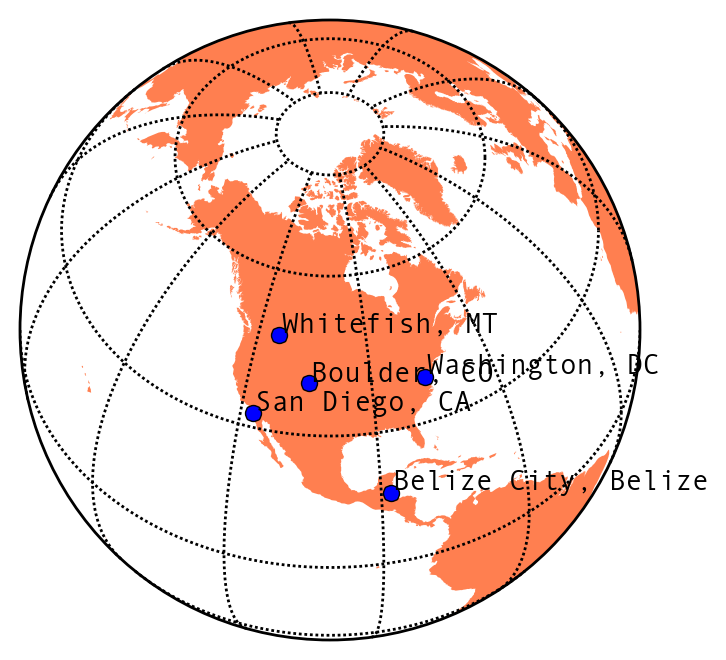

In [85]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

matplotlib.rcParams['savefig.dpi']=200


# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)

#map.drawcoastlines()
#map.drawcountries()
map.fillcontinents(color='coral')
#map.drawmapboundary()

#用经纬度标记城市
# lat/lon coordinates of five cities.
lats = [40.02, 32.73, 38.55, 48.25, 17.29]
lons = [-105.16, -117.16, -77.00, -114.21, -88.10]
cities=['Boulder, CO','San Diego, CA',
        'Washington, DC','Whitefish, MT','Belize City, Belize']
# compute the native map projection coordinates for cities.
x,y = map(lons,lats)
# plot filled circles at the locations of the cities.
map.plot(x,y,'bo')
# plot the names of those five cities.
for name,xpt,ypt in zip(cities,x,y):
    plt.text(xpt+50000,ypt+50000,name)




#The np.arange arguments tell where your latitude and longitude lines should begin and end, 
#and how far apart they should be spaced.
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

plt.show()


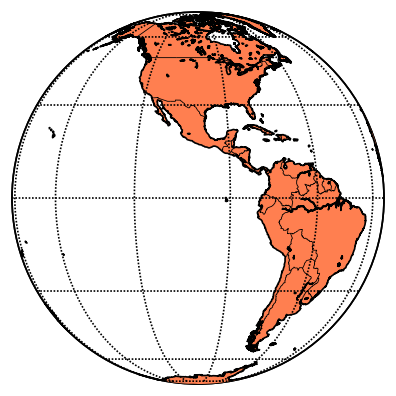

In [77]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='ortho', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()

map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

plt.show()

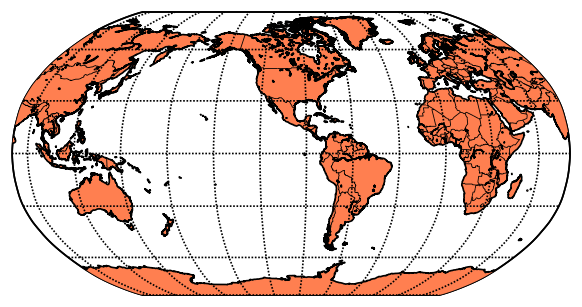

In [78]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral')
map.drawmapboundary()

map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

plt.show()


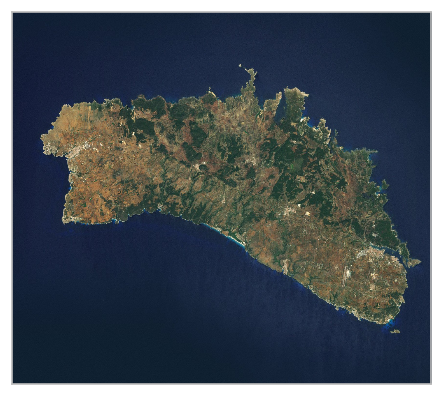

In [104]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, epsg=5520)
#http://server.arcgisonline.com/arcgis/rest/services

map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=70.0,15.0,140.0,55.0&bboxSR=4326&imageSR=4326&size=2500,1428&dpi=96&format=png32&f=image


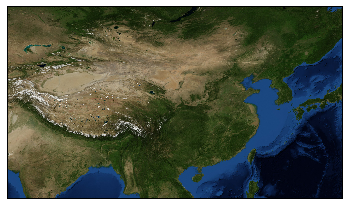

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# matplotlib.rcParams['savefig.dpi']=150

map = Basemap(llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95,)
#http://server.arcgisonline.com/arcgis/rest/services

map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, verbose= True)
plt.show()